### Libraries to import

In [250]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio

In [251]:
path1 = "_images/virtual_landscape.jpg"
path2 = "_images/cute_cat.jpg"
path3 = "_images/24_abril.webp"

### Reading and loading datasets

In [252]:
dataset = rasterio.open(path1)
dataset

/opt/anaconda3/lib/python3.13/site-packages/rasterio/__init__.py:356: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


<open DatasetReader name='_images/virtual_landscape.jpg' mode='r'>

In [253]:
print("Bounds:", dataset.bounds)      # Bounding box (minx, miny, maxx, maxy)
print("Transform:", dataset.transform) # Affine transform (map ↔ pixel)
print("Width:", dataset.width)
print("Height:", dataset.height)
print("Number of bands:", dataset.count)
print("Dtype:", dataset.dtypes)
print("Driver:", dataset.driver) 

Bounds: BoundingBox(left=0.0, bottom=1200.0, right=1920.0, top=0.0)
Transform: | 1.00, 0.00, 0.00|
| 0.00, 1.00, 0.00|
| 0.00, 0.00, 1.00|
Width: 1920
Height: 1200
Number of bands: 3
Dtype: ('uint8', 'uint8', 'uint8')
Driver: JPEG


### Reading and loading images

In [254]:
img = dataset.read() 
print("Type:", type(img))  
print("Shape:", img.shape) # shape = (bands, height, width)           
print("Width:", img.shape[2])
print("Height:", img.shape[1])
print("Number of bands:", img.shape[0])
print("Dtype:", img.dtype)

Type: <class 'numpy.ndarray'>
Shape: (3, 1200, 1920)
Width: 1920
Height: 1200
Number of bands: 3
Dtype: uint8


### Extracting bands

In [255]:
band1 = dataset.read(1)
band2 = dataset.read(2)
band3 = dataset.read(3)

In [256]:
print("Type:", type(band1))  
print("Shape:", band1.shape) # shape = (height, width)           
print("Width:", band1.shape[1])
print("Height:", band1.shape[0])
print("Dtype:", band1.dtype)

Type: <class 'numpy.ndarray'>
Shape: (1200, 1920)
Width: 1920
Height: 1200
Dtype: uint8


### Greyscale visualization

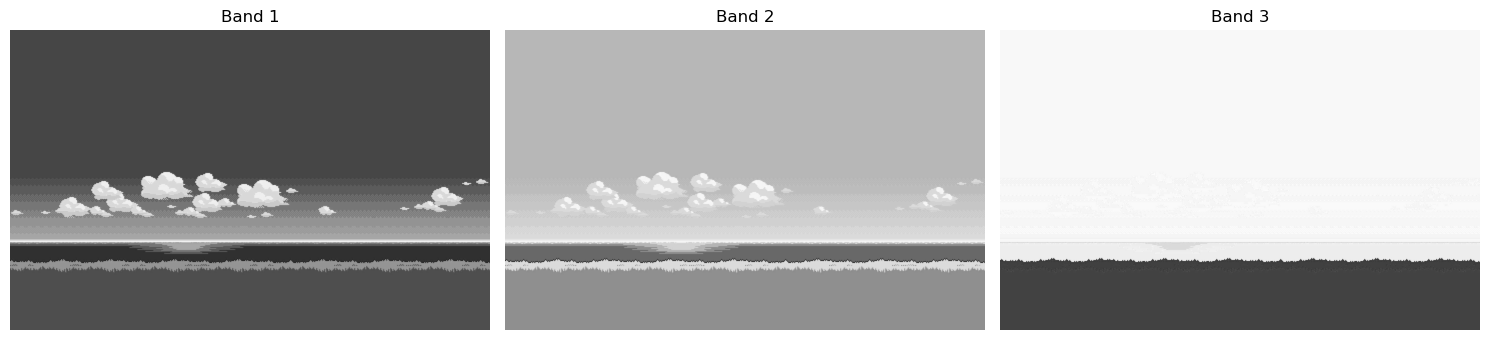

In [257]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  

for i in range(3):
    axes[i].imshow(img[i], cmap='gray')  
    axes[i].set_title(f"Band {i+1}")   
    axes[i].axis('off')

plt.tight_layout()
plt.show()


### RGB visualization

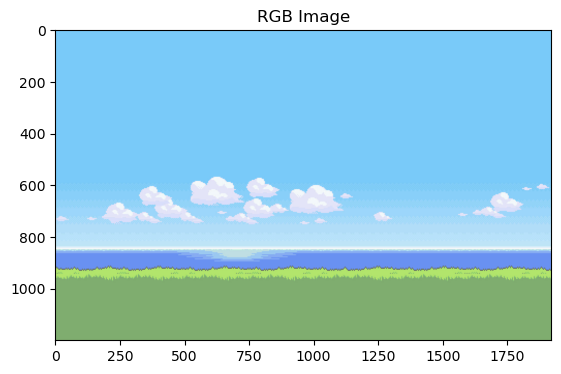

In [258]:
rgb = np.dstack((band1, band2, band3))

plt.imshow(rgb)
plt.title("RGB Image")
plt.show()


### Radiometric resolution reduction

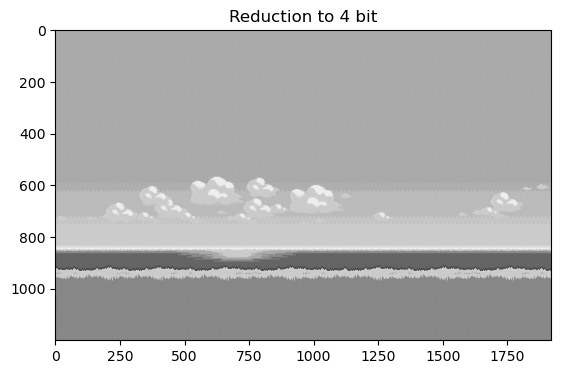

In [272]:
band = band2
normalized = (band - band.min()) / (band.max() - band.min())

bit = 4
number_of_colors = 2**bit

radiometric_reduction = np.floor(normalized * (number_of_colors-1)) / (number_of_colors-1)
radiometric_reduction = (radiometric_reduction * (band.max() - band.min()) + band.min()).astype(np.uint8)

plt.imshow(radiometric_reduction, cmap='gray')
plt.title(f"Reduction to {bit} bit")
plt.show()


In [273]:
print("Number of colors for the original band:", (len(np.unique(band))))
print("Number of colors after the radiometric reduction:", (len(np.unique(radiometric_reduction))))

Number of colors for the original band: 181
Number of colors after the radiometric reduction: 16


In [274]:
band

array([[202, 202, 202, ..., 202, 202, 202],
       [202, 202, 202, ..., 202, 202, 202],
       [202, 202, 202, ..., 202, 202, 202],
       ...,
       [173, 173, 173, ..., 173, 173, 173],
       [173, 173, 173, ..., 173, 173, 173],
       [173, 173, 173, ..., 173, 173, 173]],
      shape=(1200, 1920), dtype=uint8)

In [275]:
radiometric_reduction

array([[193, 193, 193, ..., 193, 193, 193],
       [193, 193, 193, ..., 193, 193, 193],
       [193, 193, 193, ..., 193, 193, 193],
       ...,
       [168, 168, 168, ..., 168, 168, 168],
       [168, 168, 168, ..., 168, 168, 168],
       [168, 168, 168, ..., 168, 168, 168]],
      shape=(1200, 1920), dtype=uint8)

### Bit planes

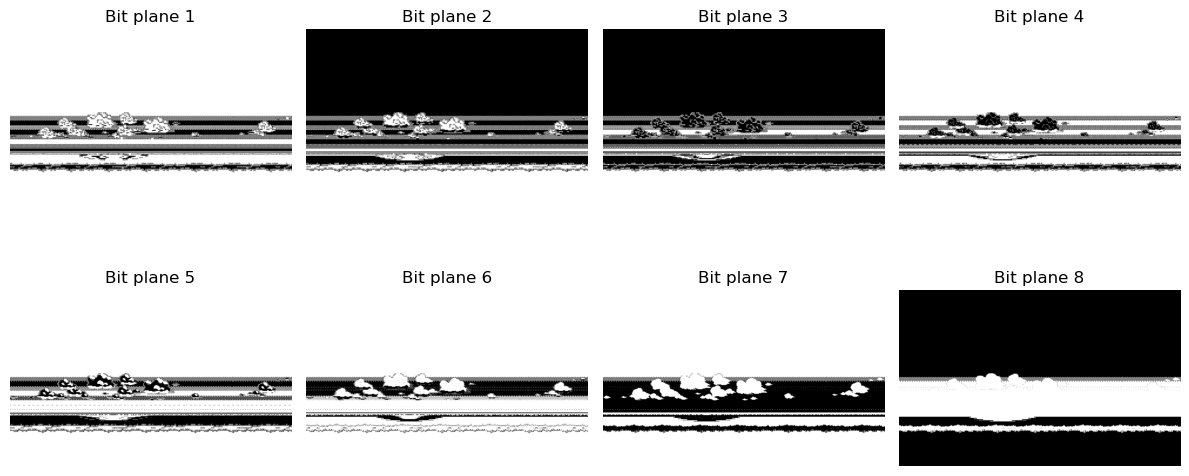

In [276]:
band = band1
bit_planes = [(band >> i) & 1 for i in range(8)]  

fig, axes = plt.subplots(2, 4, figsize=(12, 6))
axes = axes.ravel()
for i in range(8):
    axes[i].imshow(bit_planes[i], cmap='gray')
    axes[i].set_title(f"Bit plane {i+1}")
    axes[i].axis('off')
plt.tight_layout()
plt.show()
